<a href="https://colab.research.google.com/github/fmuranda/Python-for-Data-Science-and-Machine-Learning-Essential-Training-Part-1/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Training a Simple Machine Learning Model (Logistic Regression on Iris Dataset)

This example demonstrates how to train a basic classification model using scikit-learn. We will:
1. Load the Iris dataset.
2. Split the data into training and testing sets.
3. Initialize and train a Logistic Regression model.
4. Make predictions and evaluate the model's performance.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target variable (species)

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Target names:", iris.target_names)

Features (X) shape: (150, 4)
Target (y) shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# 2. Split the data into training and testing sets
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (120, 4)
Testing data shape: (30, 4)


In [ ]:
# 3. Initialize and train a Logistic Regression model
# Logistic Regression is a simple yet powerful classification algorithm.
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
# 4. Make predictions and evaluate the model

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Display a classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Generating Pair Plot...


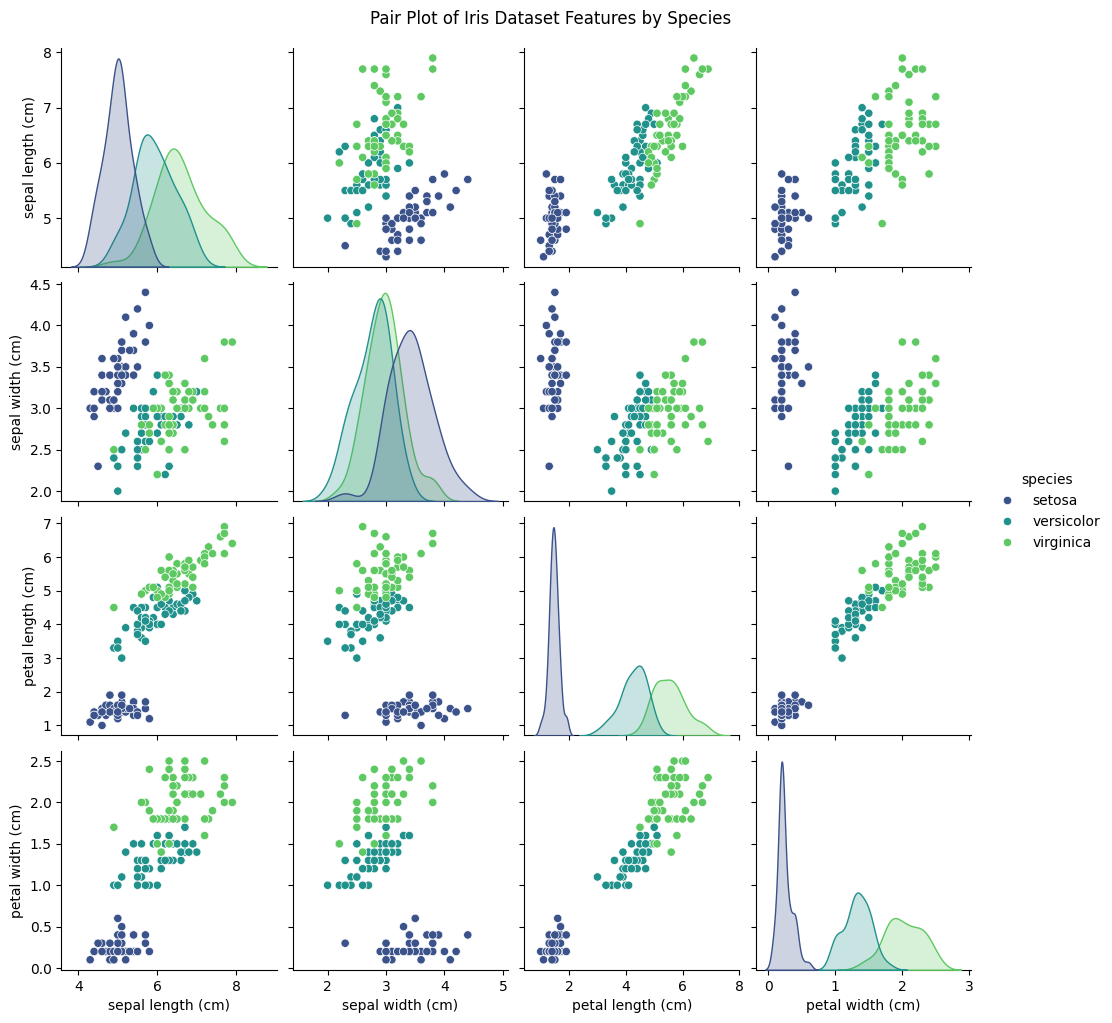

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the iris dataset to a pandas DataFrame for easier plotting
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Create a pair plot to visualize relationships between all features
print("Generating Pair Plot...")
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset Features by Species', y=1.02) # Adjust suptitle position
plt.show()

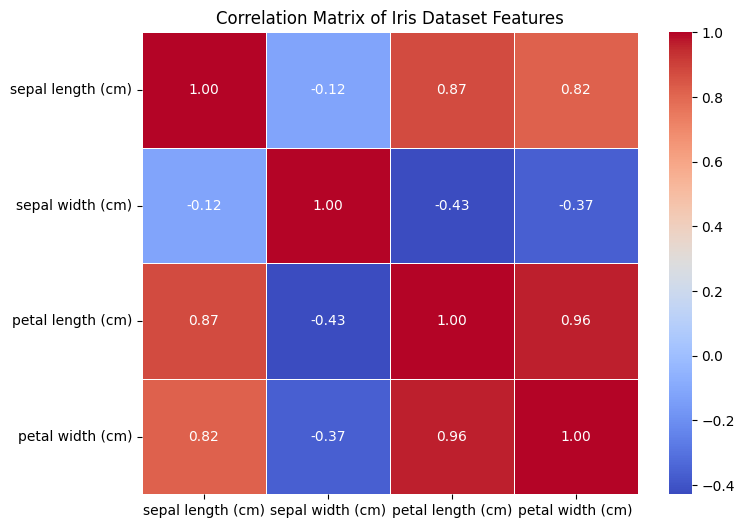

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the numerical features
# Exclude the 'species' column as it's categorical
correlation_matrix = iris_df.drop('species', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

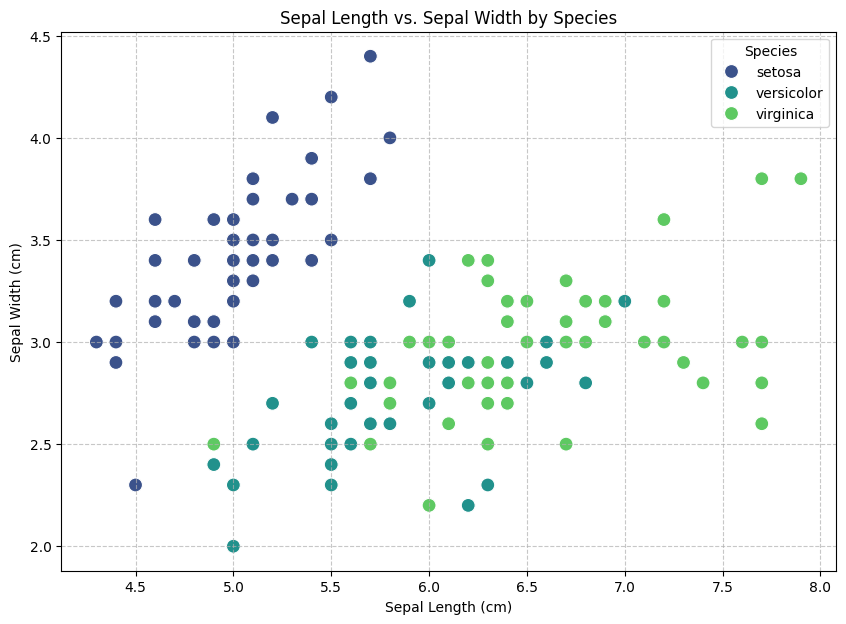

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of sepal length vs. sepal width, colored by species
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='species',
    data=iris_df,
    s=100, # Adjust marker size
    palette='viridis'
)
plt.title('Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

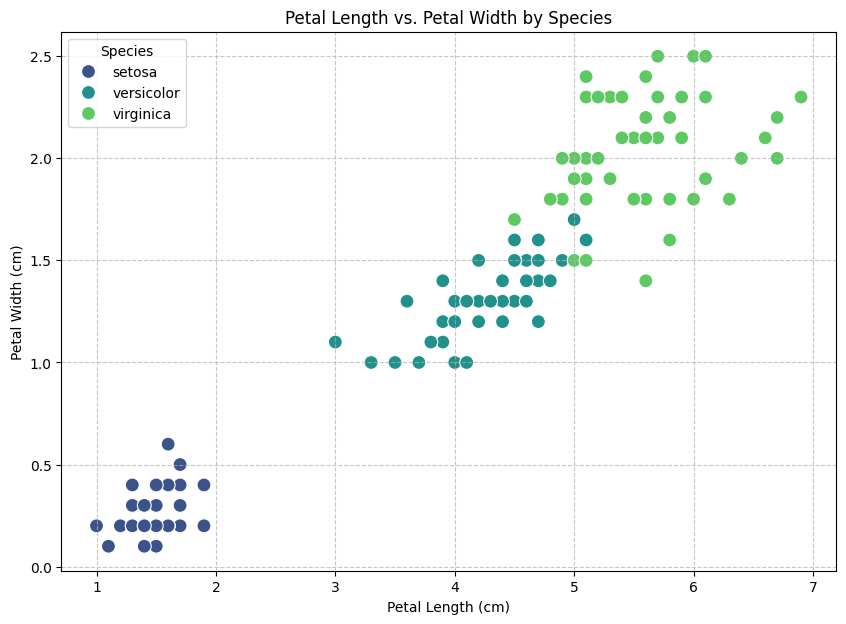

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of petal length vs. petal width, colored by species
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    data=iris_df,
    s=100, # Adjust marker size
    palette='viridis'
)
plt.title('Petal Length vs. Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import pandas as pd

# Get feature names from the iris dataset
feature_names = iris.feature_names

# Get the coefficients from the trained Logistic Regression model
# Since it's a multi-class classification, model.coef_ will be a 2D array
# We'll look at the absolute mean coefficient for each feature across classes for simplicity
coefs = model.coef_

# Calculate the mean absolute coefficient for each feature across the classes
# This gives a general idea of feature importance without getting into class-specific details
mean_abs_coefs = pd.DataFrame({'feature': feature_names, 'importance': abs(coefs).mean(axis=0)})

# Sort by importance
mean_abs_coefs = mean_abs_coefs.sort_values(by='importance', ascending=False)

display(mean_abs_coefs)

,feature,importance
2,petal length (cm),1.725424
3,petal width (cm),1.182996
1,sepal width (cm),0.641678
0,sepal length (cm),0.338955


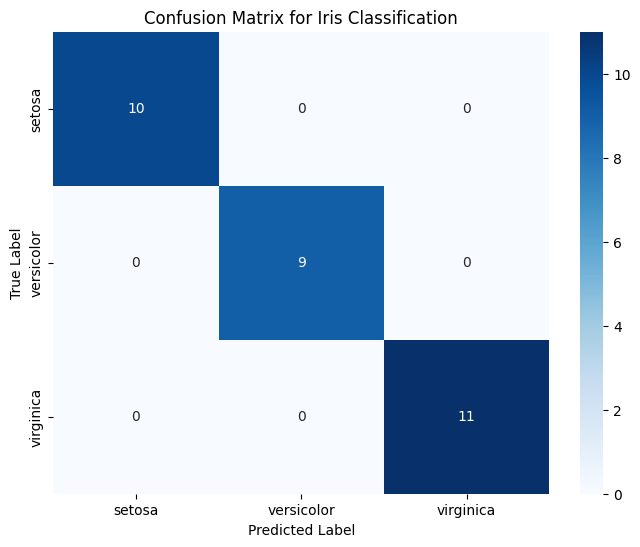

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

Generating Box Plots...


/tmp/ipython-input-2392722136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=iris_df[feature], x=iris_df['species'], palette='viridis')
/tmp/ipython-input-2392722136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=iris_df[feature], x=iris_df['species'], palette='viridis')
/tmp/ipython-input-2392722136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=iris_df[feature], x=iris_df['species'], palette='viridis')
/tmp/ipython-input-2392722136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

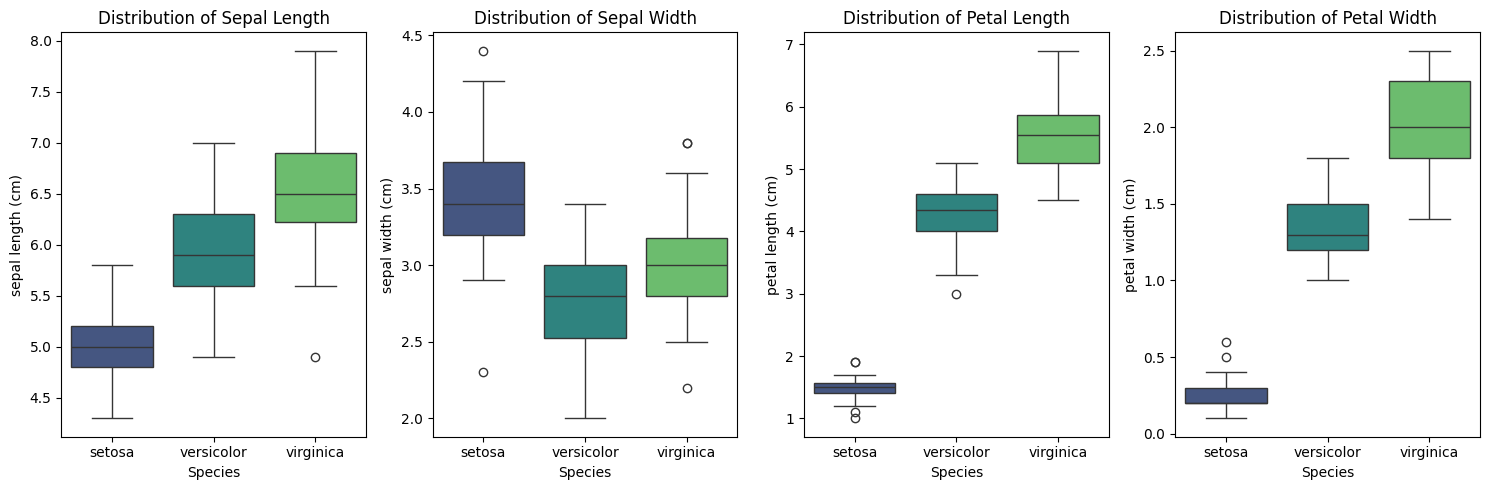

In [ ]:
# Create box plots for each feature to show their distributions
print("Generating Box Plots...")
plt.figure(figsize=(15, 5))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(1, 4, i + 1) # 1 row, 4 columns, i+1-th plot
    sns.boxplot(y=iris_df[feature], x=iris_df['species'], palette='viridis')
    plt.title(f'Distribution of {feature.replace(" (cm)", "").title()}')
    plt.ylabel(feature)
    plt.xlabel('Species')
plt.tight_layout()
plt.show()